## Labels Overview

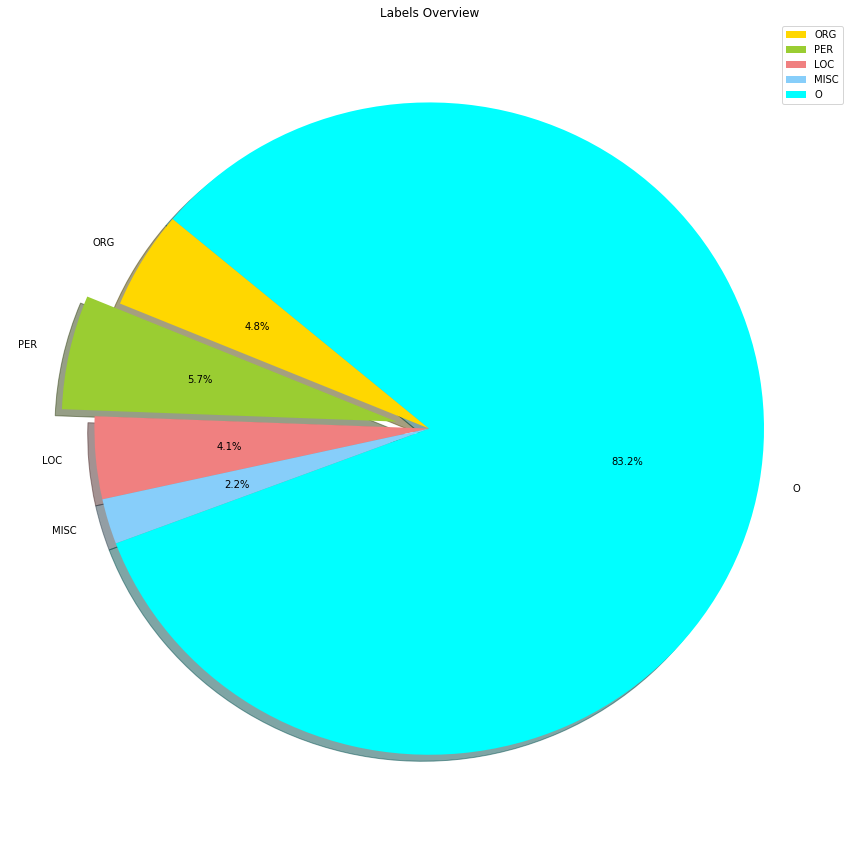

In [1]:
from collections import defaultdict
import os, json
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
label_freqs = defaultdict(int)
list_file = os.listdir()
for file in list_file:
    if not file.endswith(".clean"):
        continue
    with open(file) as fi:
        for line in fi:
            tokens = json.loads(line)
            for token in tokens:
                if len(token["target"]) > 2: token["target"] = token["target"][2:]
                label_freqs[token["target"]] += 1

label = list(label_freqs.keys())
freqs = list(label_freqs.values())
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "cyan"]
explode = (0, 0.1, 0, 0, 0)
plt.pie(freqs, explode=explode, colors=color, labels = label, 
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.title("Labels Overview")
plt.show()

## Additional Word-level Features

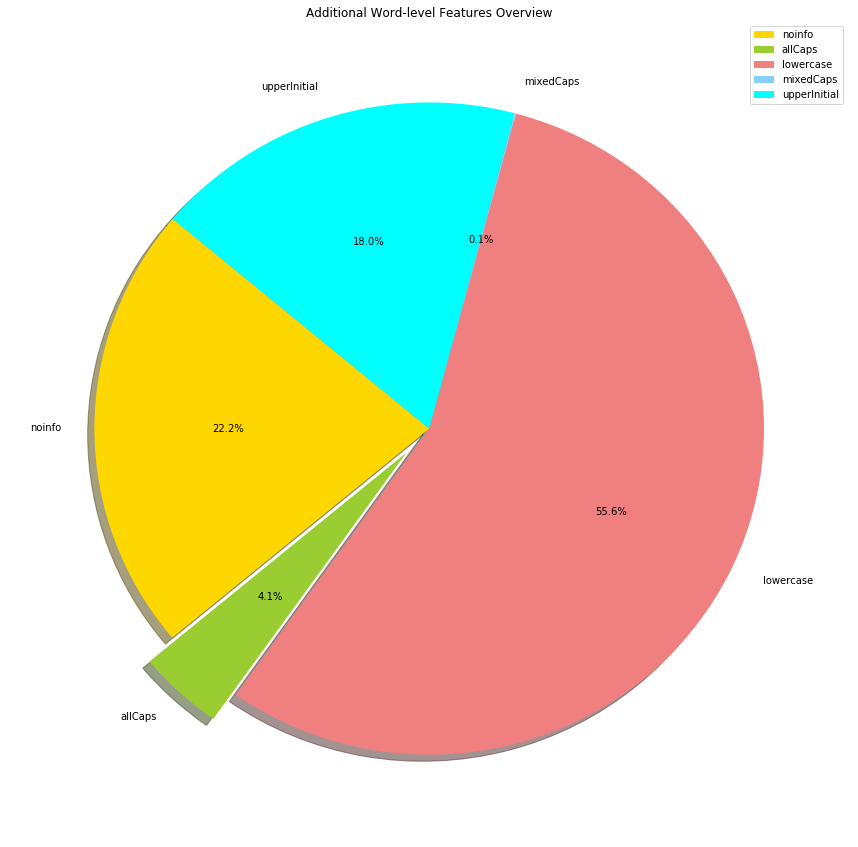

In [2]:
plt.figure(figsize=(15,15))
add_word = defaultdict(int)
list_file = os.listdir()
for file in list_file:
    if not file.endswith(".clean"):
        continue
    with open(file) as fi:
        for line in fi:
            tokens = json.loads(line)
            for token in tokens:
                if token["raw"].isupper():
                    add_word["allCaps"] += 1
                elif token["raw"].islower():
                    add_word["lowercase"] += 1
                elif token["raw"].istitle():
                    add_word["upperInitial"] += 1
                else:
                    check_noinfo = False
                    for c in token["raw"]:
                        if not c.isupper() and not c.islower():
                            check_noinfo = True
                            break
                    if check_noinfo: add_word["noinfo"] += 1
                    else: add_word["mixedCaps"] += 1
label = list(add_word.keys())
freqs = list(add_word.values())
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "cyan"]
explode = (0, 0.1, 0, 0, 0)
plt.pie(freqs, explode=explode, colors=color, labels = label, 
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Additional Word-level Features Overview")
plt.legend()
plt.show()

## Additional Character-level Features

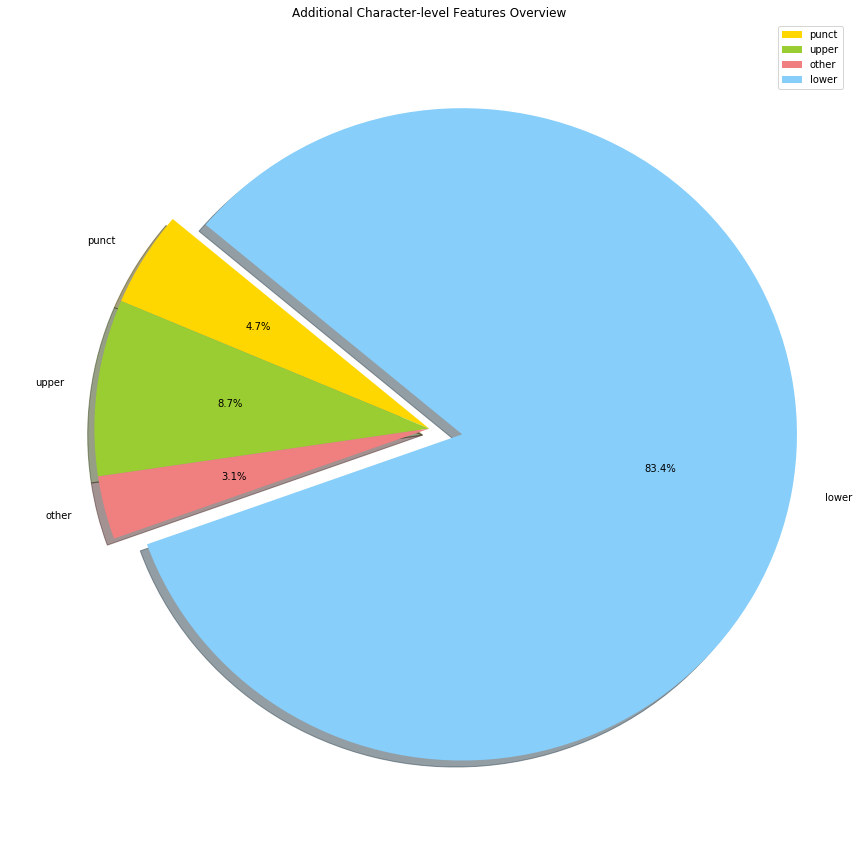

In [3]:
import string
plt.figure(figsize=(15,15))
add_char = defaultdict(int)
list_file = os.listdir()
for file in list_file:
    if not file.endswith(".clean"):
        continue
    with open(file) as fi:
        for line in fi:
            tokens = json.loads(line)
            for token in tokens:
                for c in token["raw"]:
                    if c.islower():
                        add_char["lower"] += 1
                    elif c.isupper():
                        add_char["upper"] += 1
                    elif c in string.punctuation:
                        add_char["punct"] += 1
                    else:
                        add_char["other"] += 1
label = list(add_char.keys())
freqs = list(add_char.values())
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)
plt.pie(freqs, explode=explode, colors=color, labels = label, 
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Additional Character-level Features Overview")
plt.legend()
plt.show()